In [1]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import nltk
import re
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopword = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
from textblob import TextBlob
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
data = pd.read_csv('DATA')
data

reviews
0     Not Verified | The WORST customer experience! ...
1     Not Verified |   Had to cancel my flight month...
2     ✅ Trip Verified | Flight cancelled with no rea...
3     ✅ Trip Verified | This is a route I fly regula...
4     ✅ Trip Verified |  While BA may have made some...
...                                                 ...
3816  YYZ to LHR - July 2012 - I flew overnight in p...
3817  LHR to HAM. Purser addresses all club passenge...
3818  My son who had worked for British Airways urge...
3819  London City-New York JFK via Shannon on A318 b...
3820  SIN-LHR BA12 B747-436 First Class. Old aircraf...

[3821 rows x 1 columns]

In [4]:
print (data.sample(10))

                                                reviews
2259  Heathrow to Belfast with British Airways. Boar...
2557  My son and I flew British Airways from Glasgow...
3212  LGW-TFS-LGW seat pitch and comfort were good. ...
1628  ✅ Verified Review |  Johannesburg to London He...
263   ✅ Trip Verified |  A serious medical problem a...
2533  British Airways business Class from Edinburgh ...
3477  Aberdeen-Heathrow-Miami and return World Trave...
3073  Punta Cana - Gatwick. World Traveller Plus cab...
2449  Marseilles to Montreal via London. What I got ...
2596  I usually fly on Asian airlines (ANA, EVA, Kor...


In [5]:
#removing the 'verified' part of the words as they will not be used in analysis
data['reviews'] = data['reviews'].str.strip('✅Trip Verified|')
data['reviews'] = data['reviews'].str.strip('Not Verified|')
data['reviews'] = data['reviews'].str.strip('❎not verified|')
data['reviews'] = data['reviews'].str.strip('not verified|')
data['reviews'] = data['reviews'].str.strip('✅Verified Review|')
data['reviews'] = data['reviews'].str.strip('Unverified|')

In [6]:
data.sample(10)

reviews
2810  First time to experince British Airways new sh...
3306  Just back from a fantastic 2.5 week trip to Th...
3184  London Heathrow to Dubai return. This is a fai...
204   As usual the flight is delayed. BA try to blam...
400   Flew from Amman to London on Nov. 14 2022. Not...
971   Amsterdam to London on 15th April. I arrived 3...
2399  British Airways have seriously gone downhill. ...
47    LHR to Delhi in Business. Exceptional flight. ...
650   For this flight from Heathrow T5, passengers w...
830   London to Cape Town. We had booked business cl...

**Data Preparation, Tokenization, Stopwords Removal and Stemming**

In [7]:
#Stemming is the process of reducing words to their root form. For example, "running" becomes "run".
stemmings = SnowballStemmer('english')
#lemmatization considers the context and converts the word to a meaningful base form. For example, "running" becomes "run", "better" becomes "good" if part-of-speech is considered.
Lemma = nltk.WordNetLemmatizer()

In [8]:
#Stop words are words that are commonly used in a language (like "and", "the", "is", etc.) but do not carry significant meaning and are often removed during text processing to focus on the more important words.
stop_words = set(stopwords.words("english"))
print(stop_words)

{'the', "she's", 'because', "mightn't", 'these', 'on', 'too', 'had', 've', "don't", 'by', 'herself', 'mightn', 'both', 'again', 'yourself', "shan't", 'has', 'all', 'between', 'there', 'being', 'him', 'until', 'out', 'his', "couldn't", 'i', 't', 'if', 'where', "hasn't", 'she', 'this', "wasn't", "you've", 'haven', 'each', 'over', "weren't", 'be', 'theirs', "didn't", 'at', 'is', "doesn't", 'weren', 'most', 'its', 'mustn', 'why', 'should', "aren't", 'as', 'few', 'before', 'yourselves', "isn't", "you're", 'ourselves', 'doing', 'did', "that'll", 'ours', 'then', 'couldn', 'such', "haven't", 'for', 'off', 'yours', 'them', 'are', "should've", "you'll", 'who', 'once', 'how', 'll', 'own', 'through', 'our', 'does', 'and', 'just', 'you', 'more', 'they', 're', 'didn', 'shan', "shouldn't", 'an', 'having', 'himself', 'very', 'up', 'while', 'into', 'after', 'not', 'no', 'that', 'can', 'wouldn', 'myself', "you'd", 'or', 'with', 'above', 'themselves', 'me', 'of', 'other', 'wasn', "mustn't", 'here', 'aren

In [9]:
# ## Removing Not or No Word from Stopword list
stop_words.remove('not')
stop_words.remove('no')

In [10]:
# Check if [not,no] persent or not in my stop words.

if stop_words in ['no','not']:
    print("given word is found")
else:
    print("Your Word is not Present")

Your Word is not Present


In [11]:
#converting the wordings to lower case
data['reviews'] = data['reviews'].str.lower()

In [12]:
data.sample(3)

reviews
1327  washington to prague via london. i have flown ...
3380  i feel as though i am the only traveller in th...
2794  british airways from heathrow to manchester - ...

In [13]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
#removes all punctuation characters from each  review.
data['reviews'] = data['reviews'].apply(lambda doc:"".join([x for x in doc if x not in punctuation]))

In [15]:
#removes all commas from each review.
data['reviews'] = data['reviews'].apply(lambda v: re.sub(',', '', v))

In [16]:
data.sample(10)

reviews
3577  flew from london to doha on a newly refurbishe...
1021  i booked a flight from bucharest to london and...
1337  brussels to shanghai via london heathrow all f...
2269  heathrow  paris cdg return with british airway...
2172  i havent flown british airways for quite a whi...
148   he already delayed aircraft landed and apart f...
3278  i returned from jfk last friday morning reason...
559   here was a mistake on my booking made by ba go...
1308  london to cape town flying first class with br...
3152  17 april 2015 airbus a320 business heathrow to...

In [17]:
#This line of code removes all stop words from each  review.
data['reviews'] = data['reviews'].apply(lambda y: " ".join([j for j in y.split() if j not in stop_words]))

In [18]:
# Removing Digits
data['reviews'] = data['reviews'].apply(lambda d: re.sub(r'\d','',d))

In [19]:
#okenize each review into individual words and then lemmatizes each word.
data['reviews'] = data['reviews'].apply(lambda x: [Lemma.lemmatize(word) for word in word_tokenize(x)])

In [20]:
data.sample(10)

reviews
2304  [basel, london, heathrow, british, airway, am,...
3258  [lhrlaxlhr, economy, leg, lower, deck, a, prof...
1690  [london, heathrow, stockholm, newish, aircraft...
1081  [gatwick, st, lucia, flew, ba, new, revamped, ...
1156  [loyal, customer, british, airway, since, litt...
1489  [flew, newcastle, san, francisco, via, london,...
374   [ba, update, business, class, cabin, across, n...
2775  [dont, fly, british, airway, unless, dont, bag...
26    [flew, malaga, via, lhr, boston, th, may, arri...
315   [flown, repeatedly, british, airway, one, worl...

In [21]:
#filter out words that are shorter than or equal to two characters from each review
data['reviews'] = data['reviews'].apply(lambda x: [w for w in x if len(w) > 2])

In [22]:
data.sample(10)

reviews
0     [worst, customer, experience, british, airway,...
3130  [lhrmad, boeing, full, flight, didnt, stop, cr...
3043  [may, glalhr, new, seating, seat, flight, time...
766   [gatwick, cancun, flight, late, food, bad, not...
1234  [lhr, lgw, toronto, return, finally, moved, ba...
1430  [flew, london, heathrow, belfast, city, airpor...
3291  [cairolhrsfolhr, overall, suffering, fleet, de...
2554  [impressed, british, airway, past, today, diff...
3210  [club, europe, lhr, frankfurt, rtn, outbound, ...
360   [flight, one, worst, ever, life, wanted, pampe...

### Find Frequency of Words

In [23]:
freq_dist = FreqDist()

In [24]:
df = data.copy()

In [25]:
def create_freq_dist(text):
    return FreqDist(text)

df['reviews'] = df['reviews'].apply(lambda x: create_freq_dist(x))

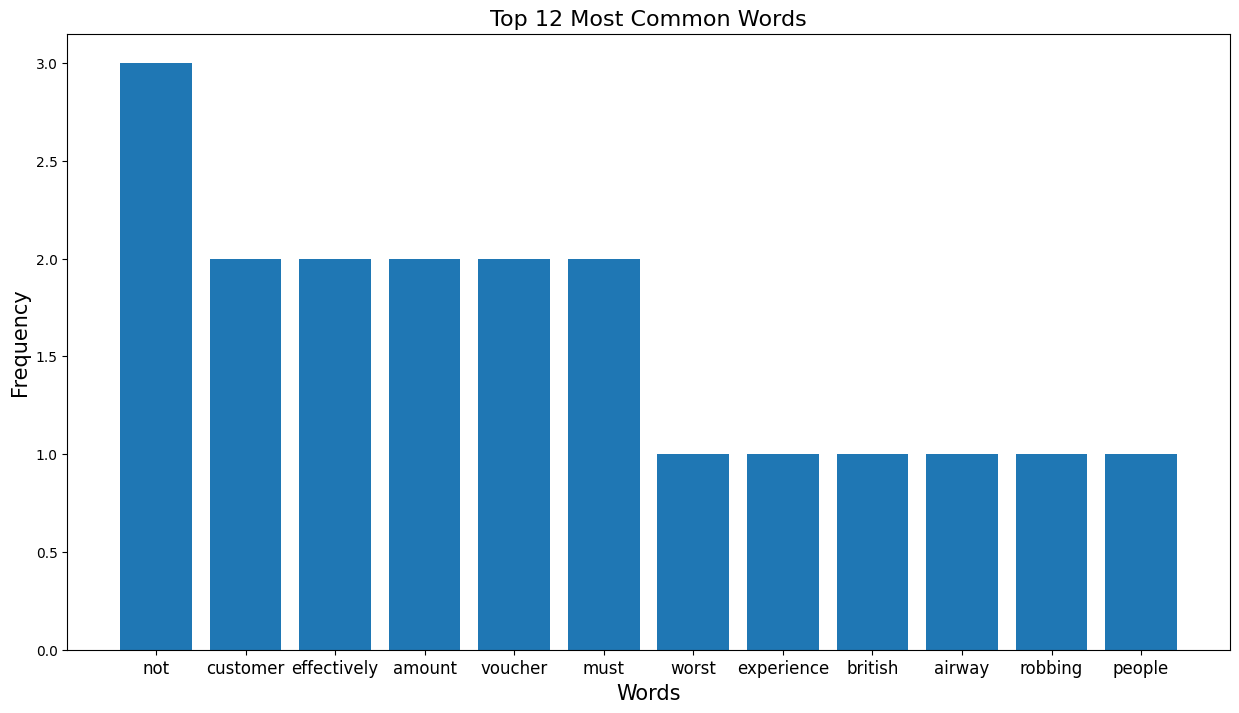

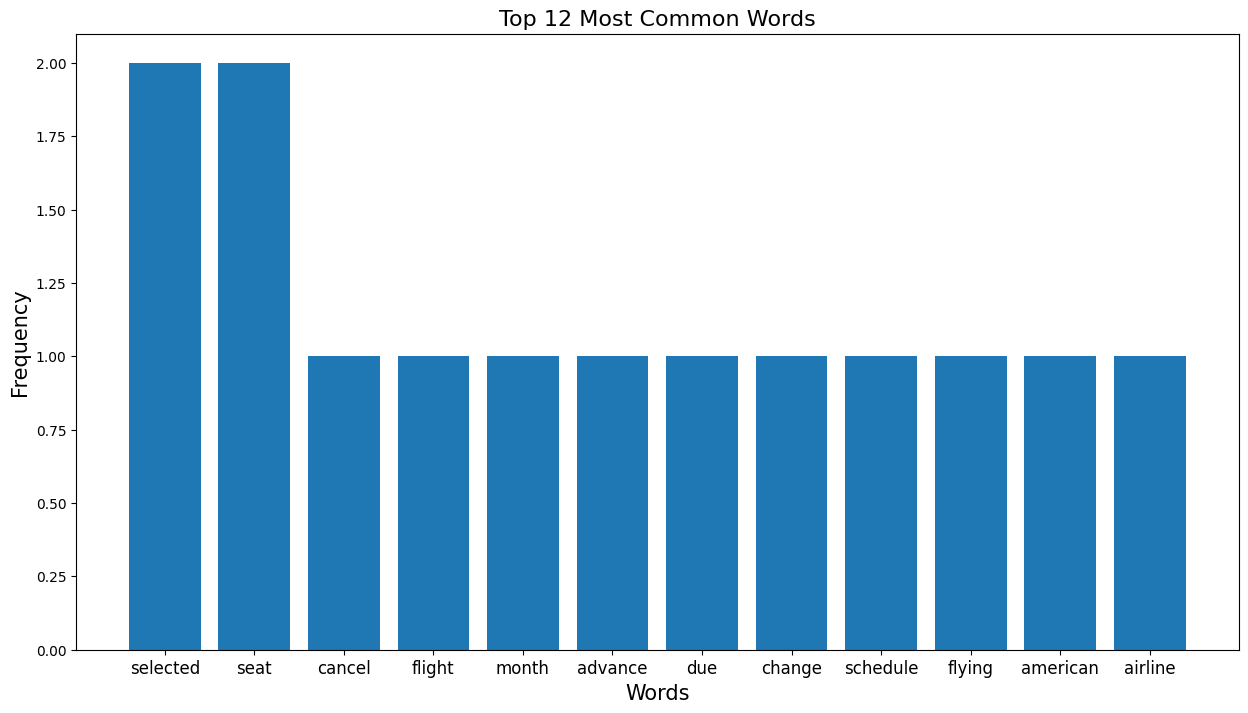

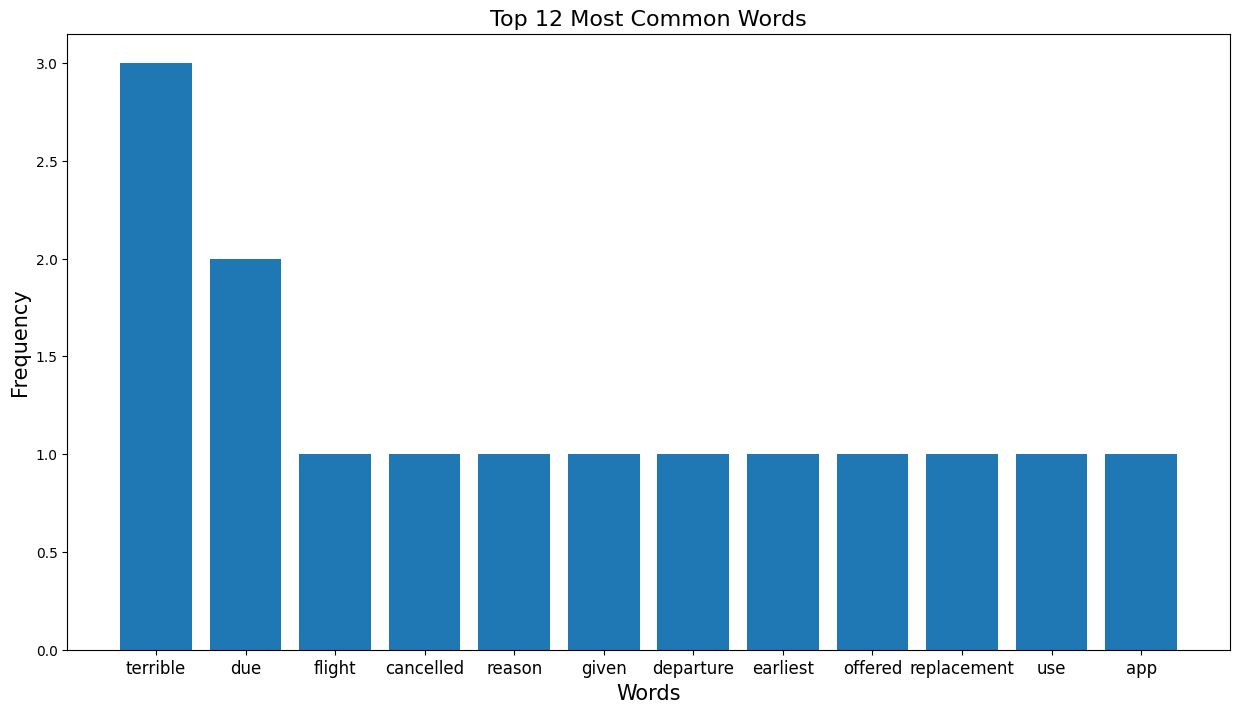

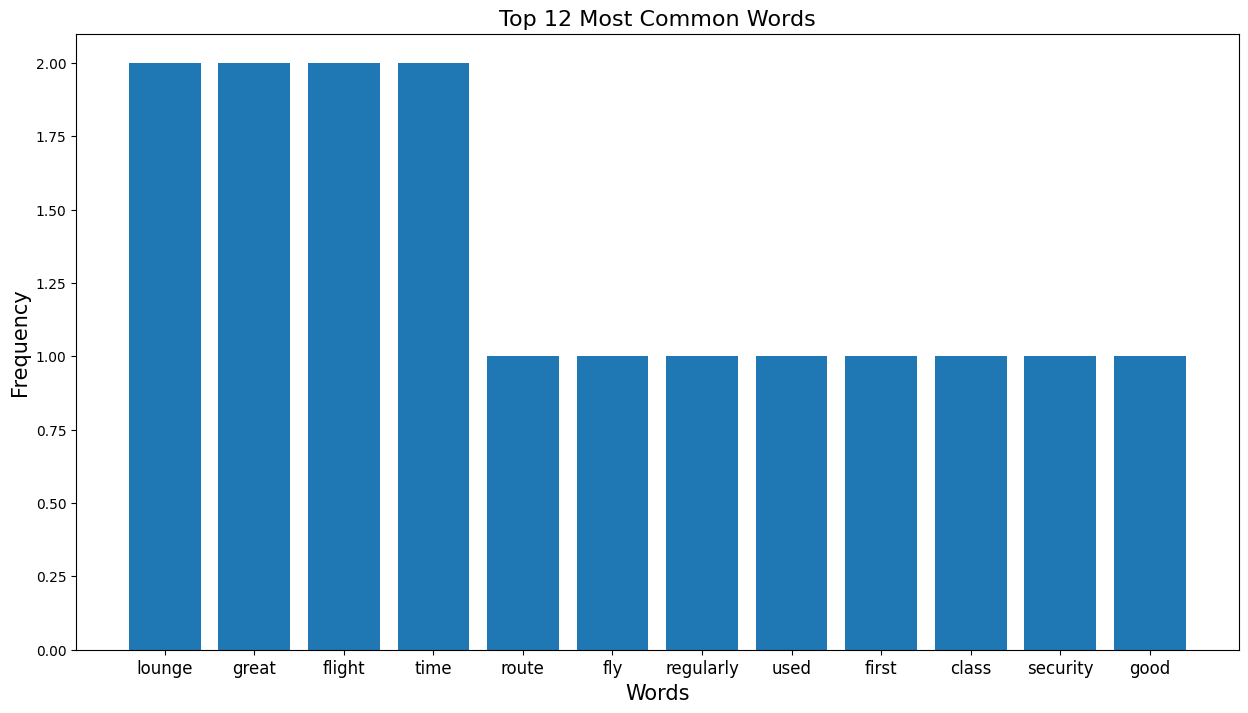

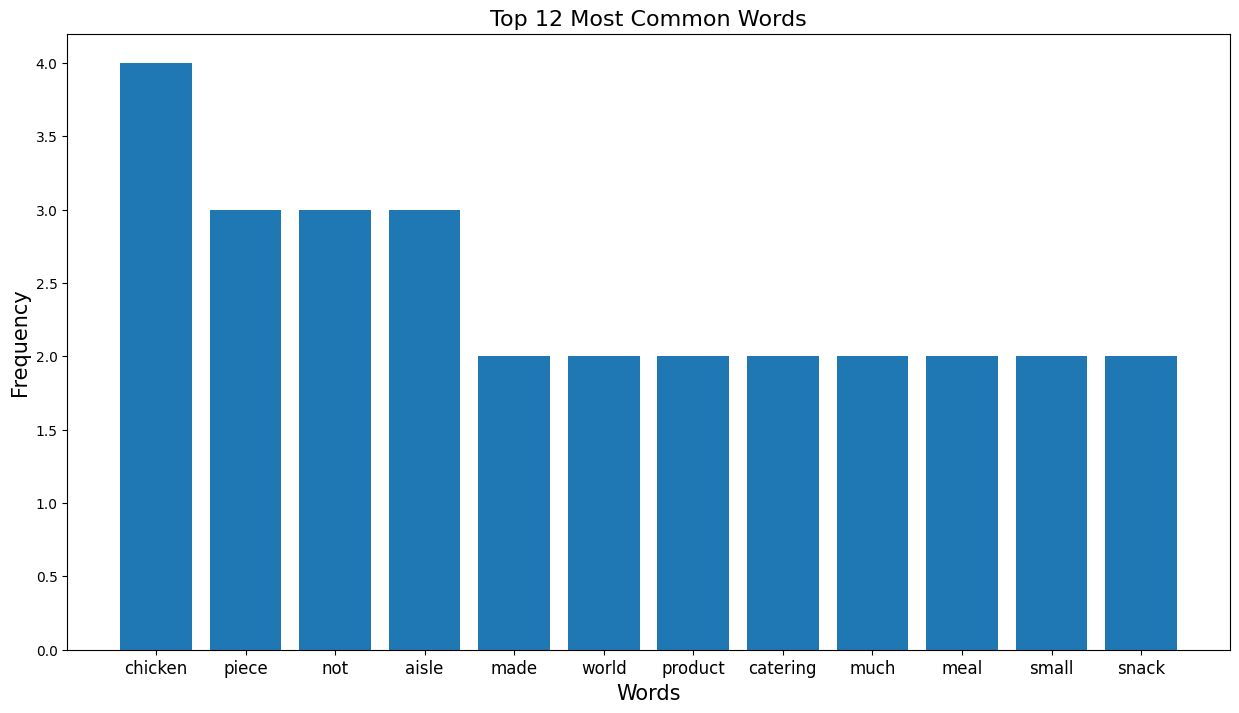

In [26]:
# Function to plot the most common words from a FreqDist
def plot_freq_dist(freq_Distribution, num_words=12):
    common_words = freq_Distribution.most_common(num_words)
    words, frequencies = zip(*common_words)

    plt.figure(figsize=(15, 8))
    plt.bar(words, frequencies)
    plt.xlabel('Words',fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.xticks(fontsize=12)
    plt.title('Top {} Most Common Words'.format(num_words),fontsize=16)
    plt.show()
for index, row in df.head(5).iterrows():
    plot_freq_dist(row['reviews'])


In [27]:
#converts each list of words  back into a single string, with words separated by spaces.
data['reviews'] = data['reviews'].apply(lambda txt: ' '.join(txt))

In [28]:
data.sample(10)

reviews
3647  got wonderful cheap fare london city florence ...
2672  london heathrow são paulo british airway one u...
2342  domestic london edinburgh return check bit sha...
2119  cently flew return trip miami onboard one airc...
3353  flew back june london heathrow lhr rome fco ou...
2145  flew london heathrow cape town via johannesbur...
303   literally worst flight life booking ticket tog...
1970  flew los angeles nice via london heathrow word...
2052  flew london heathrow bangkok british airway pr...
2917  earth happened british airway inflight meal wa...

## Subjectivity_Score

 Subjectivity Score shows how many reviewers Contain Personal Opinion.Subjectivity Score lies between (0 and 1), It shows the amount of personal opinion, If a sentence has high subjectivity i.e. close to 1, It resembles that the text contains more personal opinion than factual information.

In [29]:
def get_Subjectivity(text):
  Subjectivity_s = TextBlob(str(text))
  return Subjectivity_s.sentiment.subjectivity


data['Subjectivity_Score'] = data['reviews'].apply(lambda x: get_Subjectivity(x))

In [30]:
data

reviews  Subjectivity_Score
0     worst customer experience british airway effec...            0.701389
1     cancel flight month advance due change schedul...            0.335000
2     flight cancelled reason given departure earlie...            0.581250
3     route fly regularly used first class security ...            0.547350
4     may made positive improvement club world produ...            0.552283
...                                                 ...                 ...
3816  yyz lhr july flew overnight premium economy ch...            0.586667
3817  lhr ham purser address club passenger name boa...            0.428571
3818  son worked british airway urged fly british ai...            0.256250
3819  london citynew york jfk via shannon really nic...            0.440000
3820  sinlhr first class old aircraft seat not priva...            0.509449

[3821 rows x 2 columns]

## Compound_Score

The compound score is the sum of positive, negative & neutral scores which is then normalized between -1(most extreme negative) and +1 (most extreme positive).

In [31]:
#Creating a Object vader
vader_score = SentimentIntensityAnalyzer()

In [32]:
data['Compound_Score'] = [vader_score.polarity_scores(m)['compound'] for m in data['reviews']]

In [33]:
data

reviews  Subjectivity_Score  \
0     worst customer experience british airway effec...            0.701389   
1     cancel flight month advance due change schedul...            0.335000   
2     flight cancelled reason given departure earlie...            0.581250   
3     route fly regularly used first class security ...            0.547350   
4     may made positive improvement club world produ...            0.552283   
...                                                 ...                 ...   
3816  yyz lhr july flew overnight premium economy ch...            0.586667   
3817  lhr ham purser address club passenger name boa...            0.428571   
3818  son worked british airway urged fly british ai...            0.256250   
3819  london citynew york jfk via shannon really nic...            0.440000   
3820  sinlhr first class old aircraft seat not priva...            0.509449   

      Compound_Score  
0            -0.9556  
1            -0.2023  
2            -0.9472  
3             0.9469  
4             0.6224  
...              ...  
3816          0.8102  
3817          0.7650  
3818          0.7003  
3819          0.8070  
3820          0.1027  

[3821 rows x 3 columns]

In [34]:
def Results(text):
  over_all = vader_score.polarity_scores(text)
  if over_all['compound'] >=0.05:
    return "Positive"
  elif over_all['compound'] <= -0.05:
    return "Negative"
  else:
    return "Neutral"


data['Overall Sentiment'] = data['reviews'].apply(Results)

In [35]:
data

reviews  Subjectivity_Score  \
0     worst customer experience british airway effec...            0.701389   
1     cancel flight month advance due change schedul...            0.335000   
2     flight cancelled reason given departure earlie...            0.581250   
3     route fly regularly used first class security ...            0.547350   
4     may made positive improvement club world produ...            0.552283   
...                                                 ...                 ...   
3816  yyz lhr july flew overnight premium economy ch...            0.586667   
3817  lhr ham purser address club passenger name boa...            0.428571   
3818  son worked british airway urged fly british ai...            0.256250   
3819  london citynew york jfk via shannon really nic...            0.440000   
3820  sinlhr first class old aircraft seat not priva...            0.509449   

      Compound_Score Overall Sentiment  
0            -0.9556          Negative  
1            -0.2023          Negative  
2            -0.9472          Negative  
3             0.9469          Positive  
4             0.6224          Positive  
...              ...               ...  
3816          0.8102          Positive  
3817          0.7650          Positive  
3818          0.7003          Positive  
3819          0.8070          Positive  
3820          0.1027          Positive  

[3821 rows x 4 columns]

In [36]:
data['Overall Sentiment'].value_counts().to_frame(name="OVERALL SENTIMENT")

OVERALL SENTIMENT
Overall Sentiment                   
Positive                        2345
Negative                        1402
Neutral                           74

In [37]:
data['Overall Sentiment'].value_counts()

Overall Sentiment
Positive    2345
Negative    1402
Neutral       74
Name: count, dtype: int64

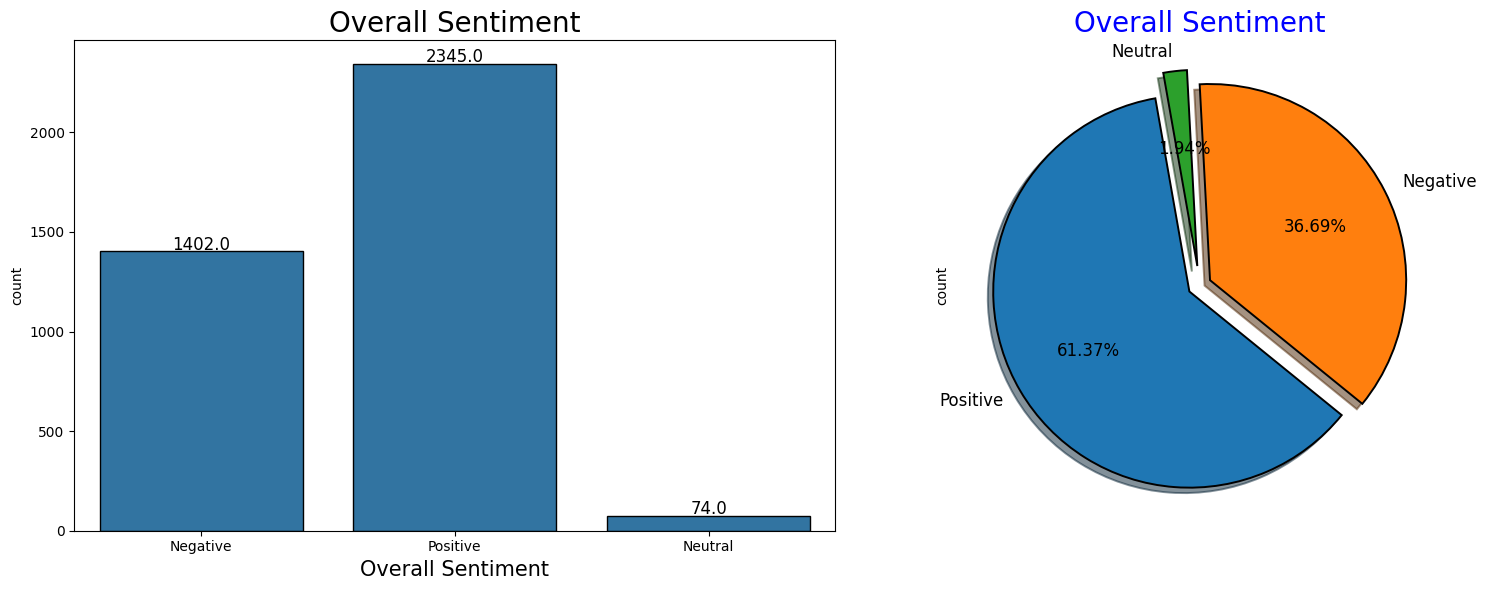

In [38]:
# Plotting
plt.figure(figsize=(16, 6))

# Countplot
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='Overall Sentiment', data=data, edgecolor="black")
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Overall Sentiment", fontsize=20)
plt.xlabel('Overall Sentiment', fontsize=15)

# Pie chart
plt.subplot(1, 2, 2)
wedgeprops = {'edgecolor': 'black', 'linewidth': 1.4}
data['Overall Sentiment'].value_counts().plot.pie(explode=[0.06, 0.06, 0.1], autopct='%1.2f%%', wedgeprops=wedgeprops, startangle=100, textprops={'color': 'black', 'fontsize': 12}, shadow=True)
plt.title("Overall Sentiment", fontsize=20, color='blue')

plt.tight_layout()
plt.show()

61.37% of the Reviews Sentiment is Positive and 36.69% Sentiment is Negative. We can say that the sentiment of maximum people is Positive.

## WordCloud

A WordCloud is a simple, weighted visual representation of the vocabulary contained in a textual dataset that allows us to estimate the contents of the data at a glance. It contains the most frequently occurring words in the data, with more frequent words appearing larger in size than less frequent ones.Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

In [39]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image


In [40]:
#concatenates all the reviews into a single string, with each review separated by a space.
text = " ".join([j for j in data['reviews']])


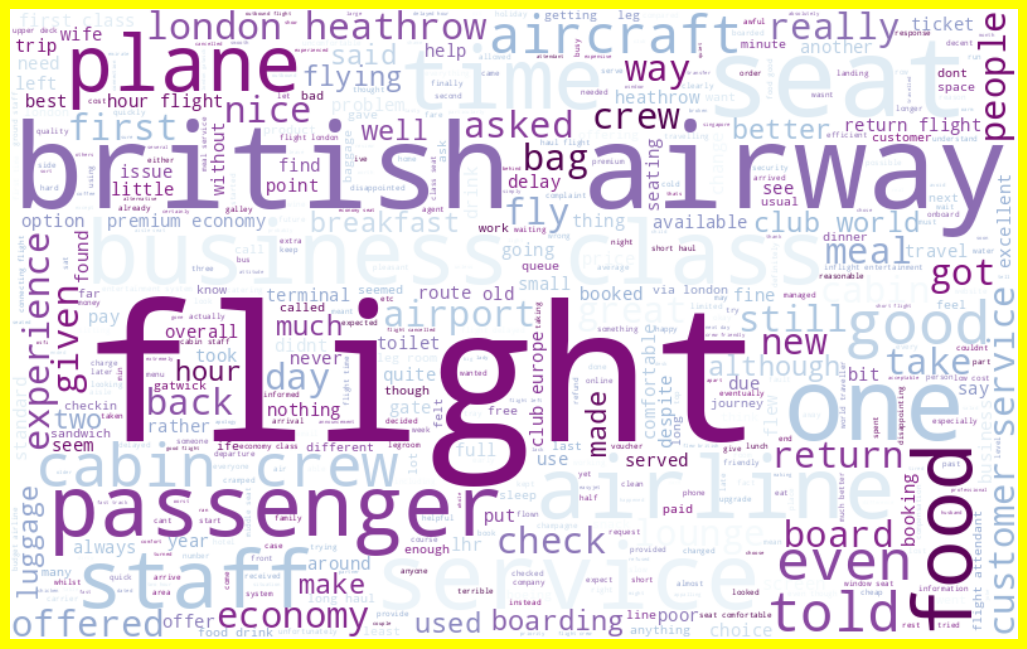

In [41]:
WC = WordCloud(background_color="white",contour_width = 2,
               contour_color = 'black',colormap = 'BuPu_r',
               max_words=500,max_font_size=150,width = 800, height = 500).generate(text)
plt.figure(figsize=(13,9),facecolor="yellow")
plt.axis("off")
plt.imshow(WC,interpolation="bilinear")

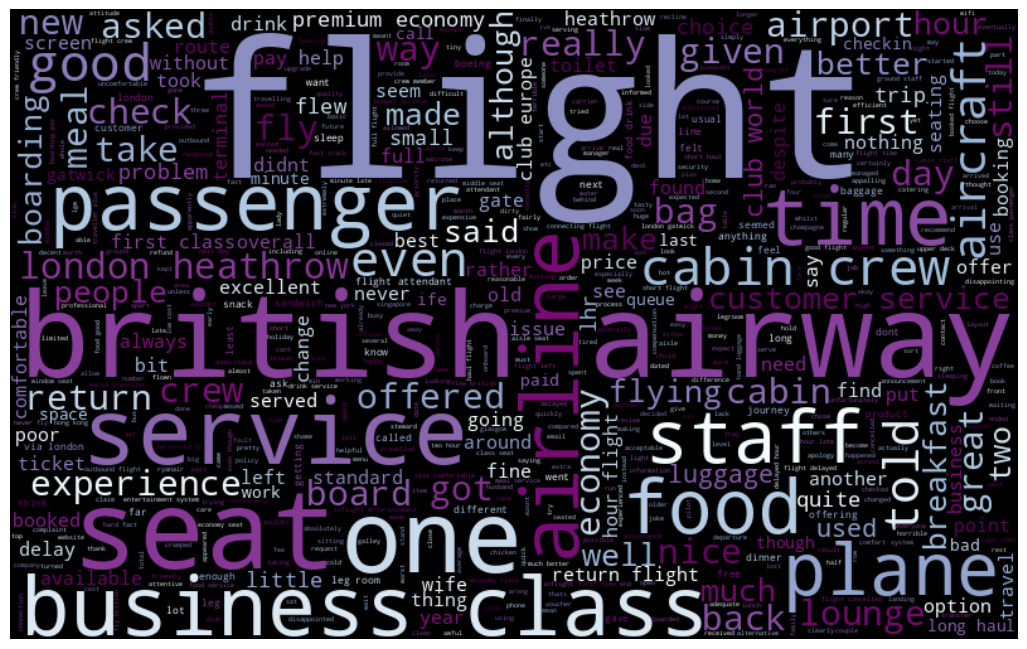

In [42]:
Word_C = WordCloud(background_color="black",contour_width = 2,colormap = 'BuPu_r',
               max_words=1000,max_font_size=150,width = 800, height = 500).generate(text)
plt.figure(figsize=(13,9))
plt.imshow(Word_C,interpolation="bilinear")
plt.axis("off")
plt.show()

In [43]:
# Filter the data for positive sentiment
positive_words = data[data['Overall Sentiment'] == 'Positive']['reviews'].str.cat(sep=' ')

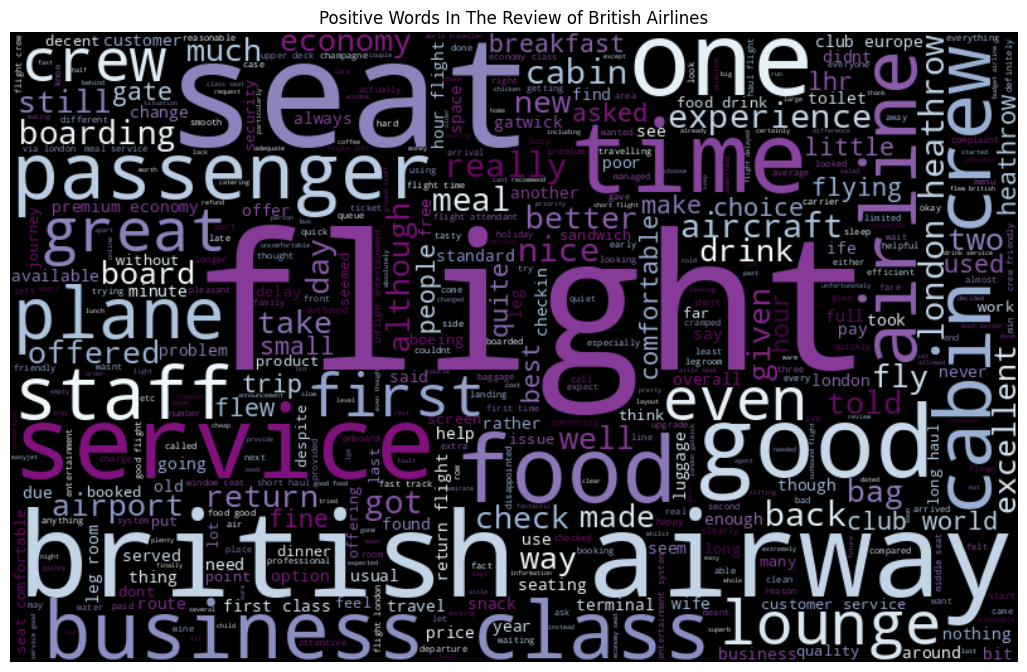

In [44]:
Pos_Cloud = WordCloud(background_color="black",contour_width = 2,colormap = 'BuPu_r',
               max_words=500,max_font_size=150,width = 800, height = 500).generate(positive_words)
plt.figure(figsize=(13,9))
plt.imshow(Pos_Cloud,interpolation="bilinear")
plt.title("Positive Words In The Review of British Airlines")
plt.axis("off")
plt.show()

In [45]:
Ne_word = data[data['Overall Sentiment'] == 'Negative']['reviews'].str.cat(sep=' ')

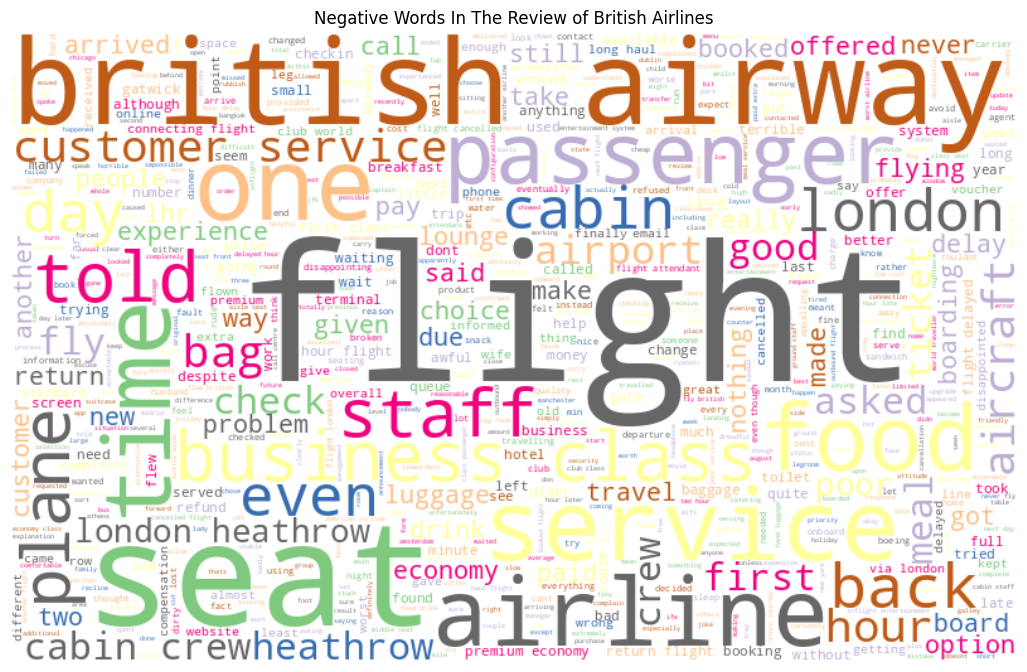

In [46]:
Word_CL = WordCloud(background_color = "white",contour_width = 2,contour_color = 'yellow',
                    colormap = 'Accent',mode="RGB",max_words=1000,max_font_size=150,
                    width = 800, height = 500).generate(Ne_word)
plt.figure(figsize=(13,9))
plt.imshow(Word_CL,interpolation="bilinear")
plt.title("Negative Words In The Review of British Airlines")
plt.axis("off")
plt.show()

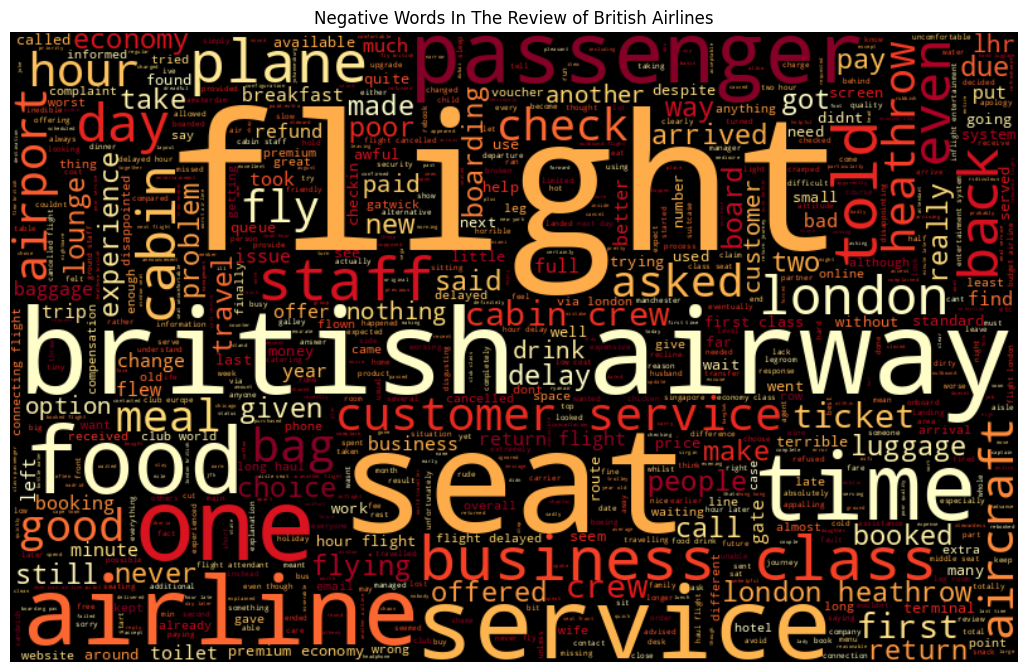

In [47]:
Negative_word = data[data['Overall Sentiment'] == 'Negative']['reviews'].str.cat(sep=' ')


Word_CLOUDS = WordCloud(background_color = "black",contour_width = 2,contour_color = 'yellow',
                        colormap = 'YlOrRd',mode="RGB",max_words=4000,max_font_size=150,
                        width = 800, height = 500).generate(Negative_word)
plt.figure(figsize=(13,9))
plt.imshow(Word_CLOUDS,interpolation='bilinear')
plt.title("Negative Words In The Review of British Airlines")
plt.axis("off")
plt.show()

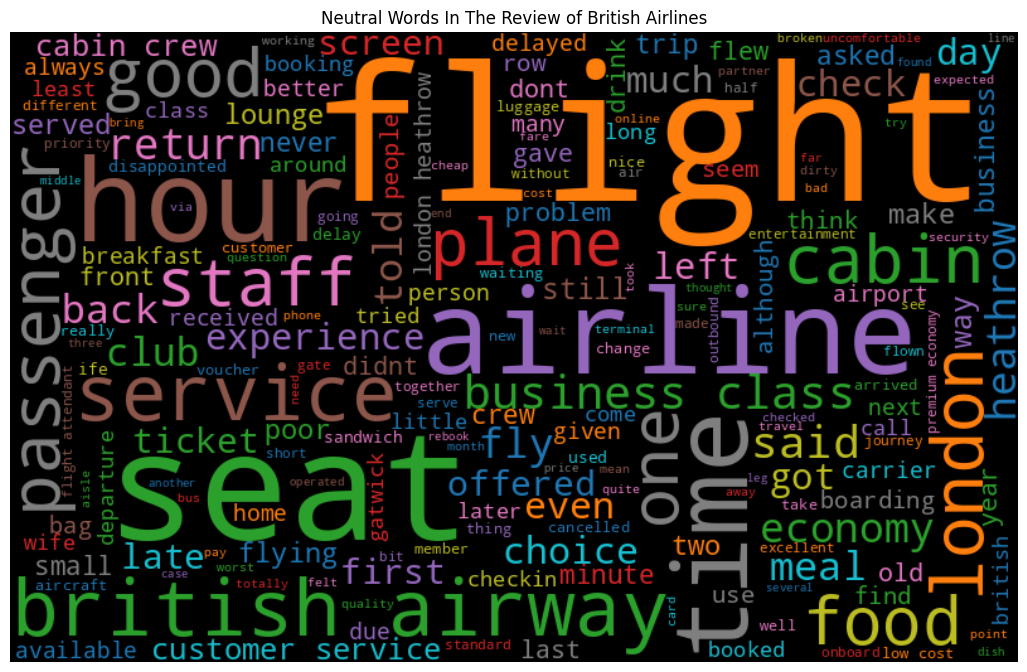

In [48]:
Neu = data[data['Overall Sentiment'] == 'Neutral']['reviews'].str.cat(sep=' ')


store = WordCloud(background_color = "black",contour_width = 2,
                  contour_color = 'yellow',colormap = 'tab10',mode="RGB",max_font_size=150,
                  width = 800, height = 500).generate(Neu)

plt.figure(figsize=(13,9))
plt.imshow(store,interpolation='bilinear')
plt.title("Neutral Words In The Review of British Airlines")
plt.axis("off")
plt.show()